In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import KMeans
from kneed import KneeLocator
import kneed
import random
import time


I generate the dataset from the two files transformed into txt, then define the following functions:

   * vectorize: takes the letter and trasfmorms is into a vector; 
   * max_length: gives the maximum string length of a protein in the dataset; 
   * PCA_2dim_real: does the principal component analysis of the input matrix in 2 dimensions. It firstly does the covariance matrix as, then it founds the real eigenvalues and eigenvectors, it sorts the eigenvalues from the higher to the lower sorting int he same order the eigenvectors. Then it returns the two eigenvectors correspondant to the higher eigenvalues; 
   * matrixazation: it transforms the given dataset into a matrix where each column is a protein formed by vectors given by the vectorize function; 
   * artist and artist2: functions that colors the dataset distinguishing the labels True-False for the first and Natural-Artificial for the second; 
   * elbow: function that gives the optimal number of clusters using the elbow method; 
   * true_boole: fucntion that transforms the True-False labels into an array of 0 and 1 (0 -> False , 1-> True). 

In [3]:
nat_data = np.genfromtxt('protein_natural_BN.txt' , dtype = str)
art_data = np.genfromtxt('protein_artificial_BN.txt' , dtype = str)

letters = [ '-','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y' ]
numbers = range( 0 , 22 )

def vectorize(letter):
    vector = np.zeros(len(letters)-1)
    k = numbers[letters.index(letter)]
    vector[k-1] = 1
    return vector

def max_length(data):
    lengths = np.zeros(len(nat_d))
    for i in range(len(nat_d)):
        lengths[i] = len(nat_d[i])
    return int(max(lengths))

def PCA_2dim_real(data):
    cov_matrix = np.cov(data)
    values , vectors = np.linalg.eig(cov_matrix)
    values , vectors = np.real(values) , np.real(vectors)
    SORT = np.argsort(values)
    values = np.sort(values)
    vectors = vectors[ : , SORT[::-1] ]
    return np.asarray( [ vectors[:,0] , vectors[:,1] ] )

def matrixazation(data , k):
    mat = np.zeros( ( 20*k , len(data) ) )
    for j in range(len(data)):
        LIST = list(data[j])
        for i in range(len(LIST)):       
            if LIST[i] == '-':
                mat[ int(20*i) : int(20*i+20) , j ] = np.zeros(20)
            else:
                mat[ int(20*i) : int(20*i+20) , j ] = vectorize(LIST[i])
    return mat

def artist(data):
    colors = np.zeros( len(data) , dtype = str )
    for j in range(len(data)):
        if str('false') in data[j]:
            colors[j] = str('red')
        elif str('true') in data[j]:
            colors[j] = str('blue')
    return colors

def artist2(data , nat):
    colors = np.zeros( len(data) , dtype = str )
    for j in range(len(data)):
        if j < len(nat):
            colors[j] = str('yellow') # NATURAL DATASET
        else:
            colors[j] = str('green') # ARTIFICIAL DATASET
    return colors

def elbow(data , max_range , min_range , sensitivity = 5 , convexity = 'convex' , derivative = 'decreasing' ):
    wcss = []
    H = range(min_range , max_range)
    for i in H:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500 , n_init=100)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    Elbow = KneeLocator(H , wcss , S = sensitivity , curve=convexity , direction=derivative)
    number_of_clusters = Elbow.elbow
    return H , wcss , number_of_clusters

def true_boole(array):
    boole = np.zeros(len(array))
    for i in range(len(array)):
        if str('true') in array[i]:
            boole[i] = int(1)
        else:
            boole[i] = int(0)
    return boole

print('functions ok!')

functions ok!


# Task 1: One-hot encoding of protein sequence data

Following we firstly define two empty lists that will contain the amminoacid sequence and the labels, then we use the previously defined functions to define a matrix with $ 20 \times 96 $ rows, one for each variable and n columns, where n is the number of protein in the dataset.

We do this process for the natural dataset and the artificial dataset.

In [4]:
nat_d = []
labelN = []
for i in range(len(nat_data)):
    if i % 2 == 0:
        labelN.append(nat_data[int(i)])
    else:
        nat_d.append(nat_data[int(i)])
nat_d , labelN = np.asarray(nat_d) , np.asarray(labelN)

kn = max_length(nat_d)

nat = matrixazation(nat_d , kn)

colorsN = artist(labelN)

print('Natural Protein Matrix, done!')

#############################################################################################

art_d = []
labelA = []

for i in range(len(art_data)):
    if i % 2 == 0:
        labelA.append(art_data[int(i)])
    else:
        art_d.append(art_data[int(i)])
art_d , labelA = np.asarray(art_d) , np.asarray(labelA)

ka = max_length(art_d)

art = matrixazation(art_d , ka)

colorsA = artist(labelA)

print('Artificial Protein Matrix, done!')

Natural Protein Matrix, done!
Artificial Protein Matrix, done!


# Task 2: Dimensional reduction and visualization of sequence space

Using the PCA function defined before we obtain the matrix with the two principal components associated eigenvectors (MAT), then we obtain the PCA representation of the dataset multiplying the dataset with MAT.

Then we plot the dataset projected onto the PCA defined subspace, coloring the points according to the protein functionality.

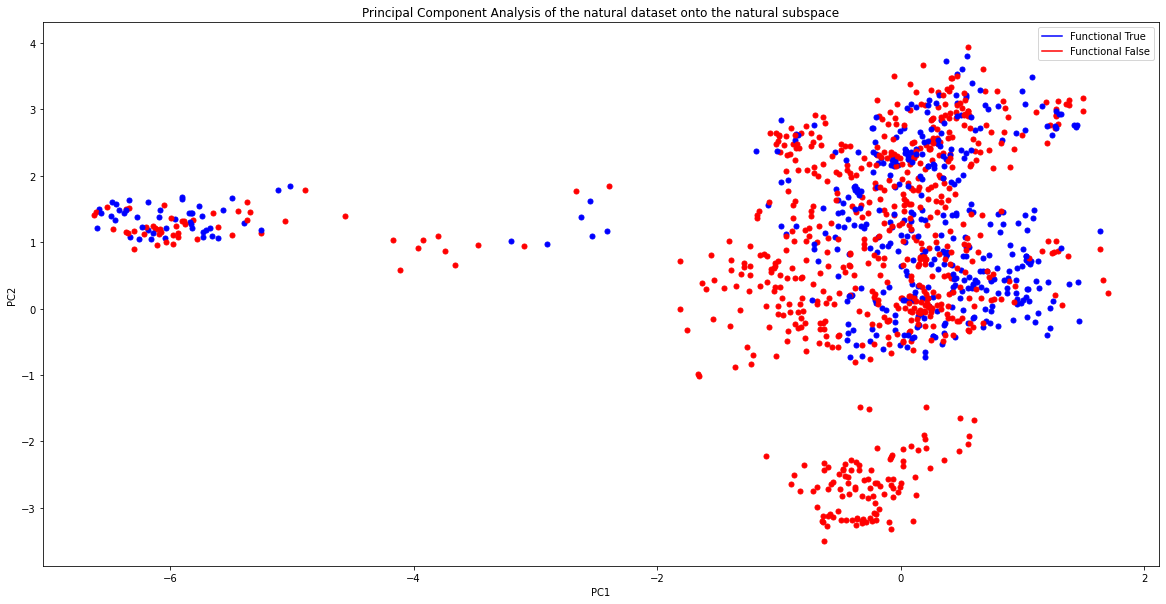

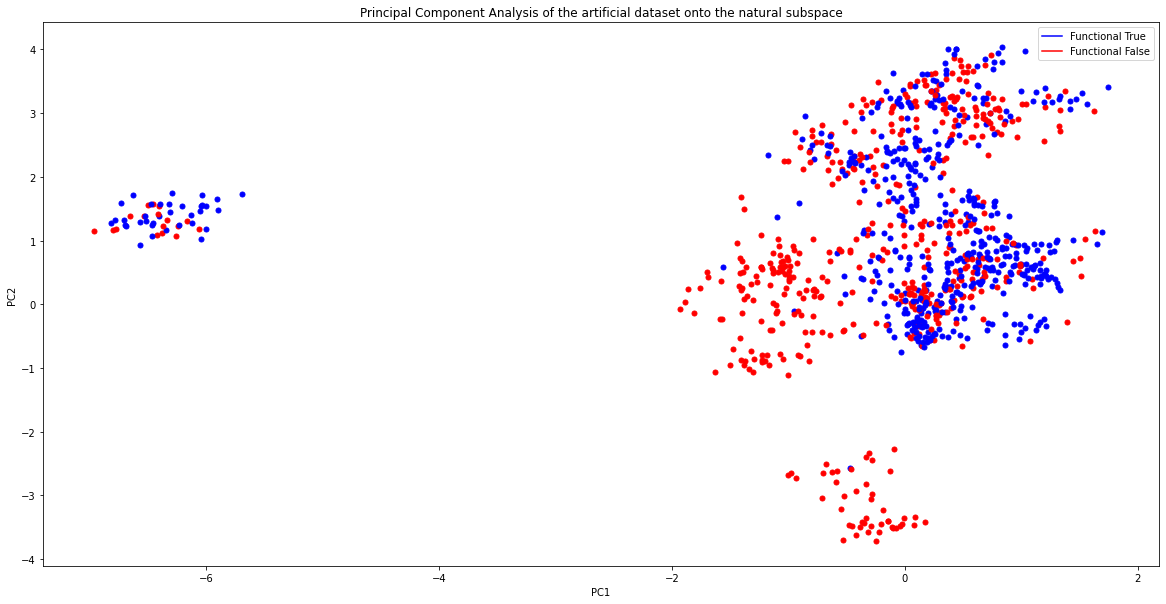

In [4]:
MAT = PCA_2dim_real(nat)

#############################################################

Yn = np.matmul( MAT , nat )

plt.figure( figsize=[20,10] )
for i in range(len(colorsN)):
    c = colorsN[i] + str('.')
    plt.plot( Yn[0,i] , Yn[1,i] , c , markersize = 10 )
plt.plot(0 , 0 , 'b' , markersize = 0 ,label = 'Functional True')
plt.plot(0 , 0 , 'r' , markersize = 0 ,label = 'Functional False')
plt.legend()
plt.title( 'Principal Component Analysis of the natural dataset onto the natural subspace' )
plt.xlabel( 'PC1' )
plt.ylabel( 'PC2' )
plt.show()

#############################################################

Ya = np.matmul( MAT , art )

plt.figure( figsize=[20,10] )
for i in range(len(colorsA)):
    c = colorsA[i] + str('.')
    plt.plot( Ya[0,i] , Ya[1,i] , c , markersize = 10 )
plt.plot(0 , 0 , 'b' , markersize = 0 ,label = 'Functional True')
plt.plot(0 , 0 , 'r' , markersize = 0 ,label = 'Functional False')
plt.legend()
plt.title( 'Principal Component Analysis of the artificial dataset onto the natural subspace' )
plt.xlabel( 'PC1' )
plt.ylabel( 'PC2' )
plt.show()

# Task 3: Clustering sequence data

We chose to use a k-means algorithm from the sklearn library to do the clustering. To obtain a good estimation about the number of clusters we used the $ \textit{elbow method} $ using the previously defined elbow function. This method gives the optimal number of clusters as the point of maximum curvature on the $ n_{cluster} $ vs. $ WCSS $ ($ \textit{Within Cluster Sum of Squares} $)  graph. The WCSS is defined as: 
$$ WCSS = \sum_{C_{k}}^{C_{n}}\sum_{d_{i}}^{d_{m}}D^{2}(d_{i},C_{k}) $$
Where $ \textit{D} $ is the Euclidean distance between the point $ d_{i} $ and the centroid $ C_{k} $.

We obtained an optimal number of 3 clusters, where one (the traingle marked) is composed by only False functionally sequences. The other two clusters are seemingly good spaced into the PCA space, but shows almost no consistency with the True-False labels.

Remembering that the PCA is a representation of the dataset onto a 2 dimensional space, this data representation is not optimal to the visualization of the cluster, so, even if the elbow method gave us $ n_{cluster} = 3 $, a higher numbe rof clusters could be optimal to additionally clusterize the star marked and point marked clusters into other clusters that could be divided by functionality but could not be well represented into the PCA subspace.

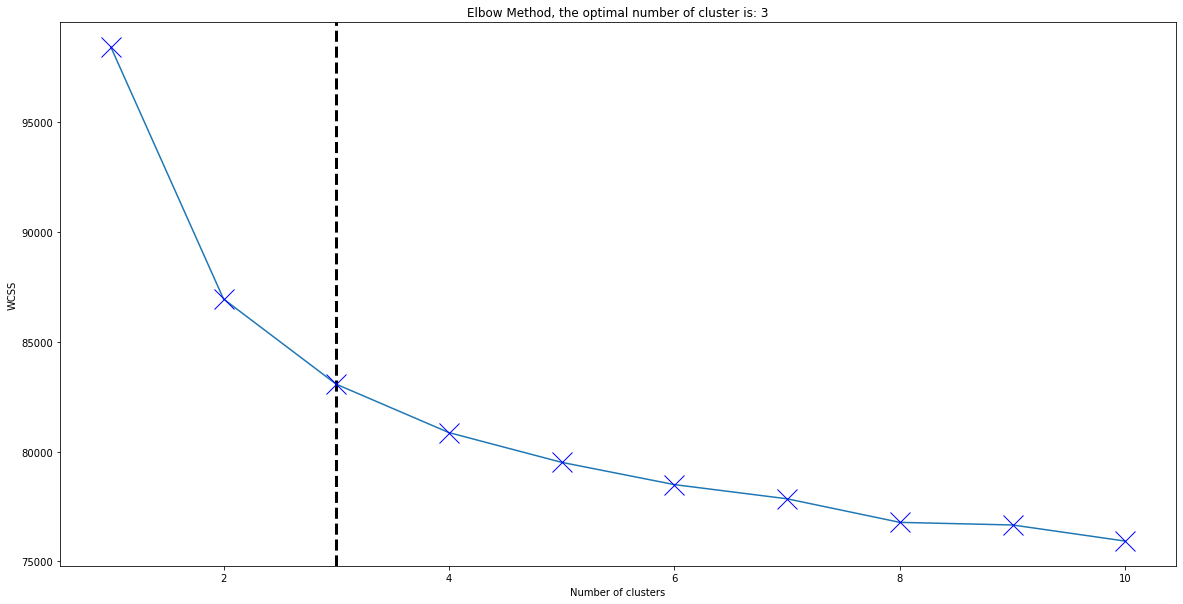

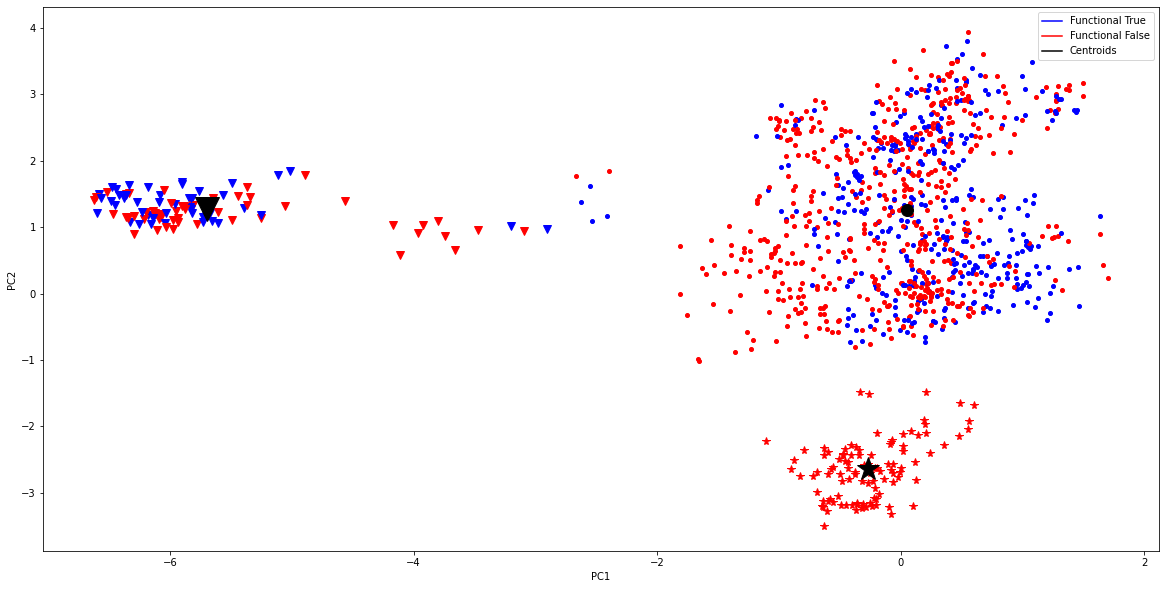

In [5]:
H , wcss , N_CLUSTERS  = elbow(nat , 11 , 1 , sensitivity = 1.0)

plt.figure(figsize = [20,10])
plt.plot(H , wcss)
plt.axvline(N_CLUSTERS , linestyle = '--' , linewidth = 3. , color = 'black')
plt.plot(H , wcss , 'bx' , markersize = 20)
plt.title('Elbow Method, the optimal number of cluster is: ' + str(N_CLUSTERS))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###################################################################################################

kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', max_iter=500, n_init=1000)
pred_y = kmeans.fit_predict(nat.T)

clusters_centers = kmeans.cluster_centers_

LABELS = kmeans.labels_

###################################################################################################

MAT = PCA_2dim_real(nat)
Yn = np.matmul( MAT , nat )
Ycenter = np.matmul( MAT , clusters_centers.T )

###################################################################################################

plt.figure( figsize=[20,10] )
for i in range(len(colorsN)):
    
    L = LABELS[i]
    
    if L == 0:
        style = str('*')
    elif L == 1:
        style = str('.')
    elif L == 2:
        style = str('v')
    elif L == 3:
        style = str('s')
                
    c = colorsN[i] + style
        
    plt.plot( Yn[0,i] , Yn[1,i] , c , markersize = 8 )
    
for i in range(len(clusters_centers[:,0])):
    if i == 0:
        style = str('k*')
    elif i == 1:
        style = str('k.')
    elif i == 2:
        style = str('kv')
    elif i == 3:
        style = str('ks')
    plt.plot( Ycenter[0,i] , Ycenter[1,i] , style , markersize = 24 )

plt.plot(0 , 0 , 'b' , label = 'Functional True')
plt.plot(0 , 0 , 'r' , label = 'Functional False')
plt.plot(0 , 0 , 'k' , label = 'Centroids')

plt.legend()
plt.xlabel( 'PC1' )
plt.ylabel( 'PC2' )
plt.show()

To obtain the complete dataset we created another txt file comprehensive of the natural and artifical dataset.

We can see that the PCA graph is not so different from the only-natural plot.

Again, fromt he elbow method, we see that the optimal number of clusters is 3 and, when plotted, the natural and artifical datasets are not well distinguishable in the graph, so there is a good mixing between these two features.

Complete Protein Matrix, done!


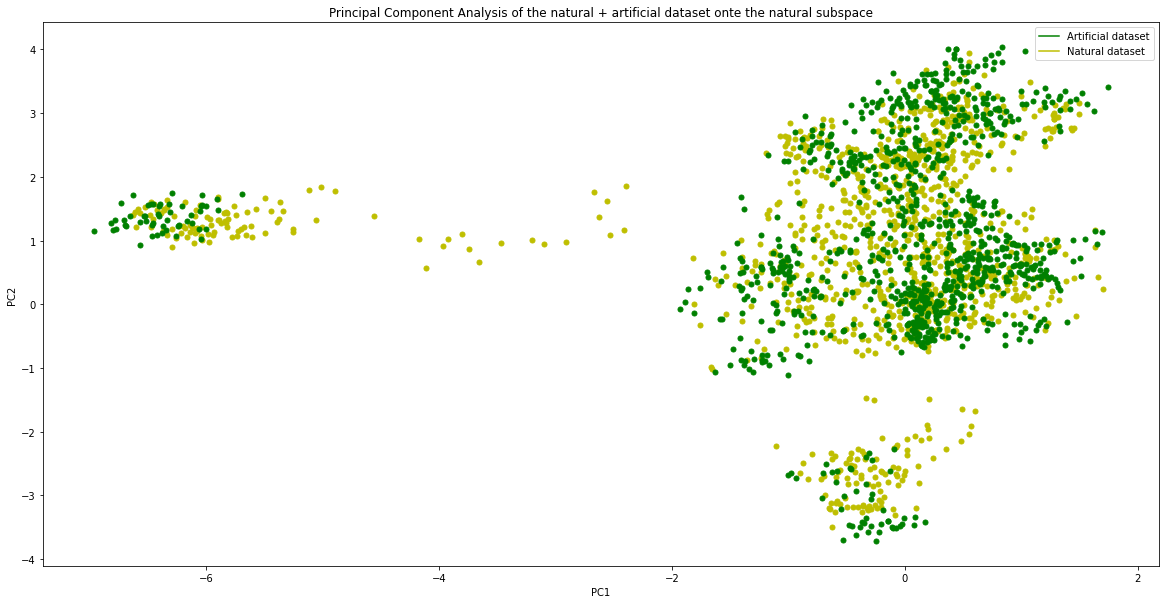

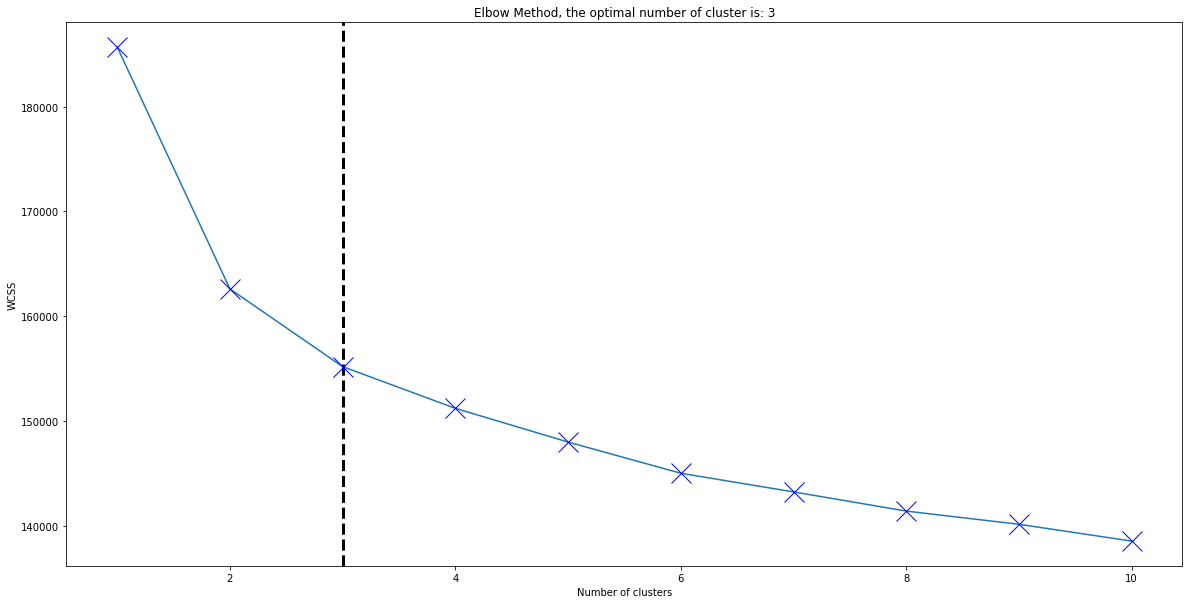

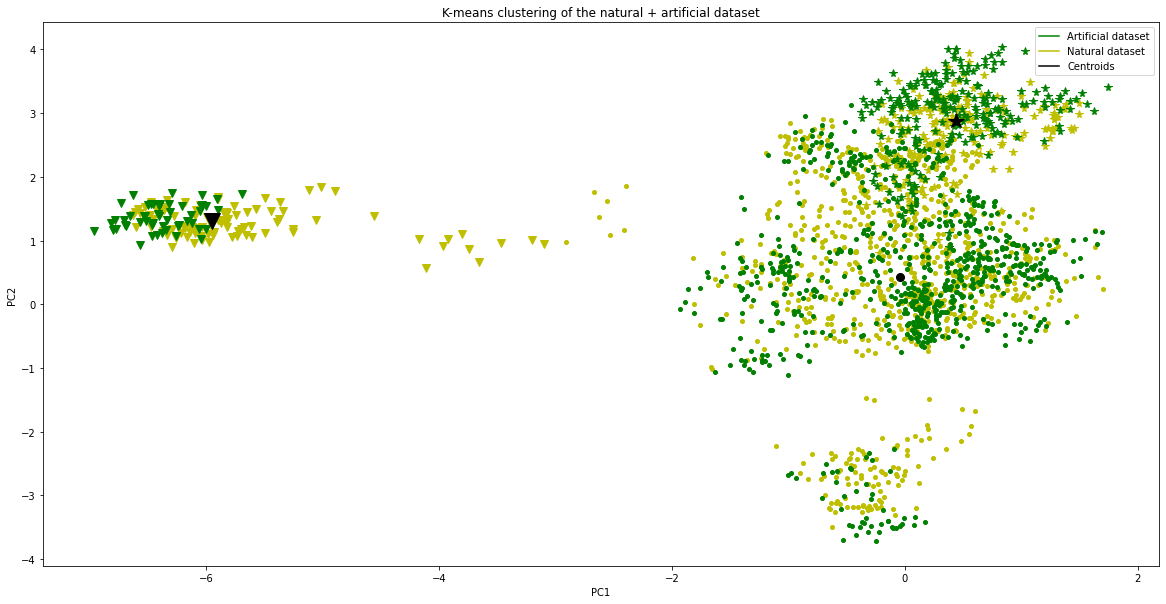

In [6]:
DATA = np.genfromtxt('protein_all.txt' , comments = '#' , dtype = str)

data = []
label = []
for i in range(len(DATA)):
    if i % 2 == 0:
        label.append(DATA[int(i)])
    else:
        data.append(DATA[int(i)])
data , label = np.asarray(data) , np.asarray(label)

k = max_length(data)

dataset = matrixazation(data , k)

colors2 = artist2(label , labelN)

print('Complete Protein Matrix, done!')

###################################################################################################

MAT = PCA_2dim_real(nat)
Yall = np.matmul( MAT , dataset )

plt.figure( figsize=[20,10] )
for i in range(len(colors2)):
    c = colors2[i] + str('.')
    plt.plot( Yall[0,i] , Yall[1,i] , c , markersize = 10 )
plt.plot(0 , 0 , 'g' ,label = 'Artificial dataset')
plt.plot(0 , 0 , 'y' ,label = 'Natural dataset')
plt.title( 'Principal Component Analysis of the natural + artificial dataset onte the natural subspace' )
plt.xlabel( 'PC1' )
plt.ylabel( 'PC2' )
plt.legend()
plt.show()

###################################################################################################

H , wcss , N_CLUSTERS  = elbow(dataset , 11 , 1 , sensitivity = 1.0)

plt.figure(figsize = [20,10])
plt.plot(H , wcss)
plt.axvline(N_CLUSTERS , linestyle = '--' , linewidth = 3. , color = 'black')
plt.plot(H , wcss , 'bx' , markersize = 20)
plt.title('Elbow Method, the optimal number of cluster is: ' + str(N_CLUSTERS))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', max_iter=500, n_init=1000)
pred_y = kmeans.fit_predict(dataset.T)

clusters_centers = kmeans.cluster_centers_

LABELS = kmeans.labels_

###################################################################################################

Ycenter = np.matmul( MAT , clusters_centers.T )

###################################################################################################

plt.figure( figsize=[20,10] )
for i in range(len(colors2)):
    
    L = LABELS[i]
    
    if L == 0:
        style = str('*')
    elif L == 1:
        style = str('.')
    elif L == 2:
        style = str('v')
    elif L == 3:
        style = str('s')
        
    c = colors2[i] + style
        
    plt.plot( Yall[0,i] , Yall[1,i] , c , markersize = 8 )
    
for i in range(len(clusters_centers[:,0])):
    if i == 0:
        style = str('k*')
    elif i == 1:
        style = str('k.')
    elif i == 2:
        style = str('kv')
    elif i == 3:
        style = str('ks')
    plt.plot( Ycenter[0,i] , Ycenter[1,i] , style , markersize = 16 )

plt.plot(0 , 0 , 'g' ,label = 'Artificial dataset')
plt.plot(0 , 0 , 'y' ,label = 'Natural dataset')
plt.plot(0 , 0 , 'k' ,label = 'Centroids')

plt.title( 'K-means clustering of the natural + artificial dataset' )
plt.legend()
plt.xlabel( 'PC1' )
plt.ylabel( 'PC2' )
plt.show()

# Task 4: Predicting protein functionality

To do the logistic regression, we defined a class Python object that takes as argument the number of iterations to compute the training and the $ \alpha $ value to use as scaling parameter for the weigths.
In the class are defined three functions:

* $ \textbf{sigmoid} $: this function takes an argument and returns the sigmoid value for it:

    $$ sigmoid(x) = \frac{1}{1+e^{-x}} $$


* $ \textbf{fit} $: this function is the training, taking as inputs the training data ($\textit{x}$) and the training outputs (the labels transformed into 0 and 1 , $\textit{y}$). The function firstly initialize the initial guessing weight ($ \textit{w} $) defined as a random number from 0 to the total number of measures (in this cases, proteins). The function also initialize a value $ M = \frac{1}{n_{variables}} $.
    
     Then, we begin the cycle over the numer of iterations initially given calcualtin the sigmoid value with argument $ x\cdot w $ and then we calcualte the cost function:

    $$ cost = -\frac{\left[  y\cdot log(z) + (1-y)\cdot log(1-z)  \right]}{n_{variables}} $$
    
    Then, we upgrade the weight value with:
    
    $$ w_{new} = w_{old} - \alpha M x^{T}\cdot(z-y) $$
    
    The cycle continues up to when the maximum interation number given is reached.


* $\textbf{predict}$: this function takes as input the test dataset and a threshold value, in this case set as 0.5 because the classification is binary, then the probability value is set to be the sigmoid of the dot prduct of the dataset with the weight and, is the value is higher than the threshold 1 is returned, else 0 is returned (True or False functionality).

In [7]:
class logistic_regression:
    
    def __init__( self , iterations , alpha ):
        self.iterations = iterations  #choosing the number of iterations (Hyperparameter)
        self.alpha = alpha       #choosing alpha(Hyperparameter) 
        
    def sigmoid(self , z):
        return 1/( 1 + np.exp(-z) )
    
    def fit( self , x , y ):              #(X-data for training, y - Output) 
        
        M = 1/len(x[:,0])
        self.w = np.random.randn( len(x[0]) , 1 )  #Initializing the weight
        
        cost_vals=[] 
        for i in range(self.iterations):     #For each number of iterations

            z = self.sigmoid(np.dot( x , self.w ))     
            
            #Creating a list with all cost values for each iteration
            cost_vals.append( -M*( np.dot( y , np.log(z) ) + ( np.dot( (1-y) , np.log(1-z) ) ) ) )
            
            #updating the weights
            self.w = self.w - np.mean( self.alpha*M*np.dot( x.T , z - np.array([y]) ) )
                
        return self
    
    def predict( self , x , threshold ):
        
        probability = self.sigmoid( np.dot( x , self.w ) )   #predicting a new set of values based on the training 
        
        if probability > threshold:
            return 1
        else:
            return 0

Here, we transform the label arrays into arrays of ones and zeros and then we train the regression using the natural dataset, we chose to set as maximum iteration number 1000 and as $\alpha$ 0.001. We also return the time it takes to train the model.

In [8]:
LabN = true_boole(labelN)
LabA = true_boole(labelA)
LabTOT = true_boole(label)

t_in = time.perf_counter()

model = logistic_regression( 1000 , 0.001 )
ll = model.fit( nat.T , LabN )

t_fin = time.perf_counter()

print( "Time for computation = " , " {:10.4f}".format( t_fin - t_in ) , ' s' )

Time for computation =      56.7042  s


Here we set the $\textit{True Positive} $, $\textit{False Positive}$, $\textit{True Negative} $ and $ \textit{False Negative}$ values at 0, upgrading their value by one accordingly from the prediction and rom the label of the artificial dataset.

Then we return the $\textit{accuracy}, \textit{sensitivity} and \textit{specificity}$ values fromt he following:

$$ Accuracy = \frac{True Positive + True Negative}{n_{data}} $$

$$ Sensitivity = \frac{True Positive}{True Positive + False Negative} $$

$$ Specificity = \frac{True Negative}{True Negative + False Positive} $$

Then we define the confusion matrix that contains the calculated values and then plot it on a color map.


We find that our model is not so accurate, and that $ Sensitivity > Specificity $. Probably this is due to the fact the training dataset does not contains much proteins or maybe that the number of variables we have is too high to be analyzed with a simple algorithm such as a logistic regression, maybe more complex algorithm such as neural networks could indeed have better results.

Accuracy =  49.55134596211366 %
Sensitivity =  27.85571142284569 %
Specificity =  71.03174603174604 %


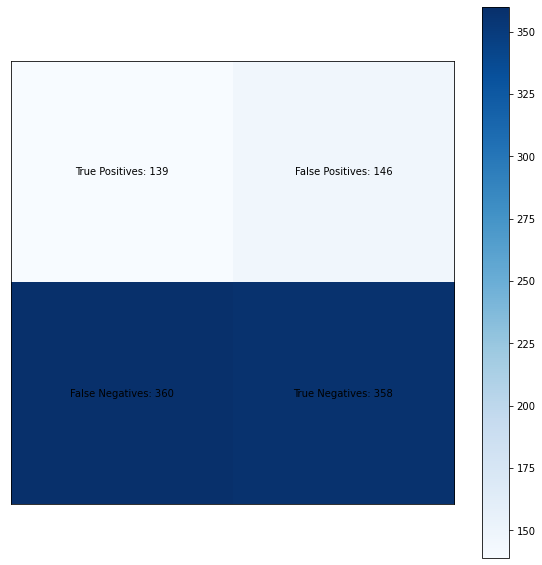

In [18]:
tp , fp , tn , fn = 0. , 0. , 0. , 0.

for i in range(len(art[0])):
    
    L , P = int(LabA[i]) , ll.predict(art[:,i] , 0.5)
    
    if P == 1 and L == 1:
        tp += 1
    elif P == 1 and L == 0:
        fp += 1
    elif P == 0 and L == 0:
        tn += 1
    elif P == 0 and L == 1:
        fn += 1

accuracy = ( tp + tn )/( tp + tn + fp + fn )
sensitivity = tp/( tp + fn )
specificity = tn/( tn + fp )

print('Accuracy = ' , accuracy*100 , '%')
print('Sensitivity = ' , sensitivity*100 , '%')
print('Specificity = ' , specificity*100 , '%')
        
C_matrix = np.asarray( [ [ int(tp) , int(fp) ] , [ int(fn) , int(tn) ] ] )

fig = plt.figure( figsize = [8 , 8] )
plt.imshow( C_matrix , interpolation='nearest' , cmap=plt.cm.Blues )

for i in range( len(C_matrix[:,0]) ):
    for j in range( len(C_matrix[0]) ):
        
        if j == 0:
            if i == 0:
                string = str('True Positives: ')
            else:
                string = str('False Negatives: ')
        else:
            if i == 0:
                string = str('False Positives: ')
            else:
                string = str('True Negatives: ')
                
        plt.text( j , i , string + format(C_matrix[i,j]) , ha = 'center' , va = 'center' , color = 'black' )
        
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.colorbar()
plt.show()   